<a href="https://colab.research.google.com/github/jandot/i0p16a/blob/main/unsupervised_learning_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning: clustering

Remember to make your own copy of the file!


`File` -> `Save a copy in drive`

For this section on clustering, please answer the questions that you'll encounter below in the following form: https://docs.google.com/forms/d/e/1FAIpQLSessAIZxYpx59AtmPssNFTn5J1ovWOkDyCq83-UP7QyzaWvxQ/viewform?usp=sf_link




In this part of unsupervised learning, we will focus on Clustering and apply some of methods on the Fisher iris dataset, and the dry bean dataset by Koklu & Ozkan (2020). We will use:

* K-means
* Hierarchical Clustering
* HDBSCAN (It extends DBSCAN by converting it into a hierarchical clustering algorithm)


## Datasets
### Fisher iris dataset
<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*f6KbPXwksAliMIsibFyGJw.png" width=500px >

The iris dataset (https://www.kaggle.com/datasets/uciml/iris) used in a paper by Sir Ronald Fisher in 1936 describes 150 iris flowers, equally distributed across 3 species: Iris setosa, Iris versicolor and Iris virginica. For each flower, the following features are recorded:

The data table looks like this:

<div style="font-size: xx-small;">

| sepal_length | sepal_width | petal_length | petal_width | species |
|--|--|--|--|--|
| 5.1 | 3.5 | 1.4 | 0.2 | setosa |
| 4.9 | 3.0 | 1.4 | 0.2 | setosa |
| 4.7 | 3.2 | 1.3 | 0.2 | setosa |
| 4.6 | 3.1 | 1.5 | 0.2 | setosa |
| 5.0 | 3.6 | 1.4 | 0.2 | setosa |
| 5.4 | 3.9 | 1.7 | 0.4 | setosa |
| 4.6 | 3.4 | 1.4 | 0.3 | setosa |
| 5.0 | 3.4 | 1.5 | 0.2 | setosa |
| 4.4 | 2.9 | 1.4 | 0.2 | setosa |
| ... | ... | ... | ... | ... |

</div>

### Beans dataset
<img src="https://ars.els-cdn.com/content/image/1-s2.0-S0168169919311573-gr3.jpg" width=500px />

The beans dataset can be retrieved from https://www.kaggle.com/datasets/sansuthi/dry-bean-dataset and contains descriptions of 13,611 images of 7 different beans. These descriptions cover the following 16 features:

1. Area (A): The area of a bean zone and the number of pixels within its boundaries.
2. Perimeter (P): Bean circumference is defined as the length of its border.
3. Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.
4. Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.
5. Aspect ratio (K): Defines the relationship between L and l.
6. Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.
7. Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
8. Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.
9. Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
10. Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
11. Roundness (R): Calculated with the following formula: (4piA)/(P^2)
12. Compactness (CO): Measures the roundness of an object: Ed/L
13. ShapeFactor1 (SF1)
14. ShapeFactor2 (SF2)
15. ShapeFactor3 (SF3)
16. ShapeFactor4 (SF4)
17. Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)

_Reference: Koklu M and Ozkan IA (2020) “Multiclass Classification of Dry Beans Using Computer Vision and Machine Learning Techniques.” Computers and Electronics in Agriculture 174:105507._

The data table looks like this:

<div style="font-size: xx-small;">

| Area | Perimeter | MajorAxisLength | MinorAxisLength | AspectRation | Eccentricity | ConvexArea | EquivDiameter | Extent | Solidity | roundness | Compactness | ShapeFactor1 | ShapeFactor2 | ShapeFactor3 | ShapeFactor4 | Class |
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
| 28395 | 610.291 | 208.1781167 | 173.888747 | 1.197191424 | 0.549812187 | 28715 | 190.1410973 | 0.763922518 | 0.988855999 | 0.958027126 | 0.913357755 | 0.007331506 | 0.003147289 | 0.834222388 | 0.998723889 | SEKER |
| 28734 | 638.018 | 200.5247957 | 182.7344194 | 1.097356461 | 0.411785251 | 29172 | 191.2727505 | 0.783968133 | 0.984985603 | 0.887033637 | 0.953860842 | 0.006978659 | 0.003563624 | 0.909850506 | 0.998430331 | SEKER |
| 29380 | 624.11 | 212.8261299 | 175.9311426 | 1.209712656 | 0.562727317 | 29690 | 193.4109041 | 0.778113248 | 0.989558774 | 0.947849473 | 0.908774239 | 0.007243912 | 0.003047733 | 0.825870617 | 0.999066137 | SEKER |
| 30008 | 645.884 | 210.557999 | 182.5165157 | 1.153638059 | 0.498615976 | 30724 | 195.4670618 | 0.782681273 | 0.976695743 | 0.903936374 | 0.928328835 | 0.007016729 | 0.003214562 | 0.861794425 | 0.994198849 | SEKER |
| 30140 | 620.134 | 201.8478822 | 190.2792788 | 1.06079802 | 0.333679658 | 30417 | 195.896503 | 0.773098035 | 0.99089325 | 0.984877069 | 0.970515523 | 0.00669701 | 0.003664972 | 0.941900381 | 0.999166059 | SEKER |
| 30279 | 634.927 | 212.5605564 | 181.5101816 | 1.171066849 | 0.52040066 | 30600 | 196.3477022 | 0.775688485 | 0.989509804 | 0.943851783 | 0.923725952 | 0.007020065 | 0.003152779 | 0.853269634 | 0.999235781 | SEKER |
| 30477 | 670.033 | 211.0501553 | 184.0390501 | 1.146768336 | 0.489477894 | 30970 | 196.9886332 | 0.762401501 | 0.984081369 | 0.853079869 | 0.933373552 | 0.006924899 | 0.003242016 | 0.871186188 | 0.999048736 | SEKER |
| 30519 | 629.727 | 212.9967551 | 182.7372038 | 1.165590535 | 0.513759558 | 30847 | 197.1243203 | 0.770681818 | 0.989366875 | 0.967109244 | 0.925480392 | 0.006979152 | 0.003158285 | 0.856513956 | 0.99834456 | SEKER |
| 30685 | 635.681 | 213.5341452 | 183.1571463 | 1.165852108 | 0.51408086 | 31044 | 197.659696 | 0.771561479 | 0.988435769 | 0.954239808 | 0.925658498 | 0.00695891 | 0.00315155 | 0.856843654 | 0.998952981 | SEKER |
| ... | ... | ... | ... | ... | ... | ... | ... | ... | ... | ... | ... | ... | ... | ... | ... | ... |

</div>

## Setting things up
See https://scikit-learn.org/stable/install.html for instructions on how to install the scikit-learn library. We will also need seaborn for plotting. If they are not installed, you can install them straight from within this notebook using the "bang" command `!pip install scikit-learn seaborn`.

In [1]:
!pip install scikit-learn seaborn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme(style="ticks")

## 1 Fisher's iris dataset


The data is available from http://vda-lab.github.io/assets/iris.csv.

In [26]:
df_iris = pd.read_csv('http://vda-lab.github.io/assets/iris.csv')
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


As a reminder, let's make a scatterplot matrix of the numerical features, coloured by species. This will give us a first idea of the data so that we know what we're working with.

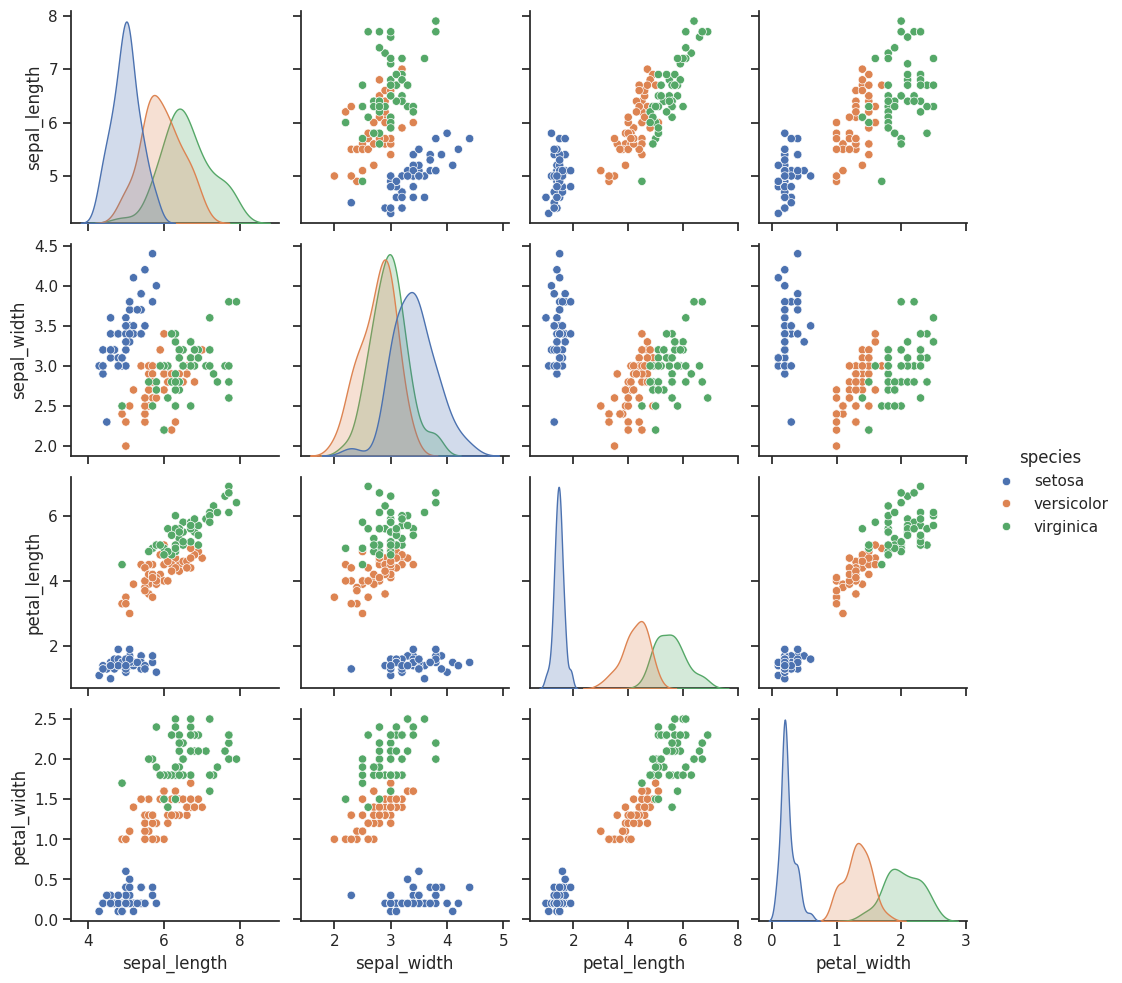

In [27]:
sns.pairplot(df_iris, hue="species")

We'll apply different clustering methods, so make sure to _first_ **go through the documentation at https://scikit-learn.org/stable/modules/clustering.html**

IMPORTANT: The API documentation for scikit-learn (https://scikit-learn.org/stable/modules/classes.html) includes code snippets at the end of each page, which we will copy-paste-modify in our own notebook below.

Note: sklearn works with numpy datastructures instead of pandas structures, so we will have to make sure to have the correct type for the rest of the notebook.

In [28]:
# Show the first 10 iris flowers
df_iris.values[:10]

array([[5.1, 3.5, 1.4, 0.2, 'setosa'],
       [4.9, 3.0, 1.4, 0.2, 'setosa'],
       [4.7, 3.2, 1.3, 0.2, 'setosa'],
       [4.6, 3.1, 1.5, 0.2, 'setosa'],
       [5.0, 3.6, 1.4, 0.2, 'setosa'],
       [5.4, 3.9, 1.7, 0.4, 'setosa'],
       [4.6, 3.4, 1.4, 0.3, 'setosa'],
       [5.0, 3.4, 1.5, 0.2, 'setosa'],
       [4.4, 2.9, 1.4, 0.2, 'setosa'],
       [4.9, 3.1, 1.5, 0.1, 'setosa']], dtype=object)

For our k-means clustering, we want to only use the numerical values (i.e. not the species), so we'll create a new dataframe X that only holds that data.

In [29]:
X = df_iris[['sepal_length','sepal_width','petal_length','petal_width']].values
print(type(df_iris))
print(type(X))
print(X[:10])

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


### 1.1 K-Means
Here we'll explore K Means Clustering, which is an unsupervised clustering technique, that is, finding clusters in data based on the data attributes alone (not the labels).

K Means is a relatively easy-to-understand algorithm. It searches for cluster centers which are the mean of the points within them, such that every point is closest to the cluster center it is assigned to.




Below, we use scikit-learn's implementation to calculate the clusters. Check the documentation on the scikit-learn website! (see link above).

After we have calculated the clusters, we add a column to the `df_iris` dataset that contains the cluster number for that particular datapoints.

In [49]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(X)
df_iris['kmeans_cluster'] = list(map(str, kmeans.labels_))

df_iris

,sepal_length,sepal_width,petal_length,petal_width,species,kmeans_cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,0
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


Based on the table above: do the clusters agree with the species labels?

Let's also plot 2 features (e.g. `sepal_length` and `sepal_width`) and colour them by species (first plot) or cluster (second plot).

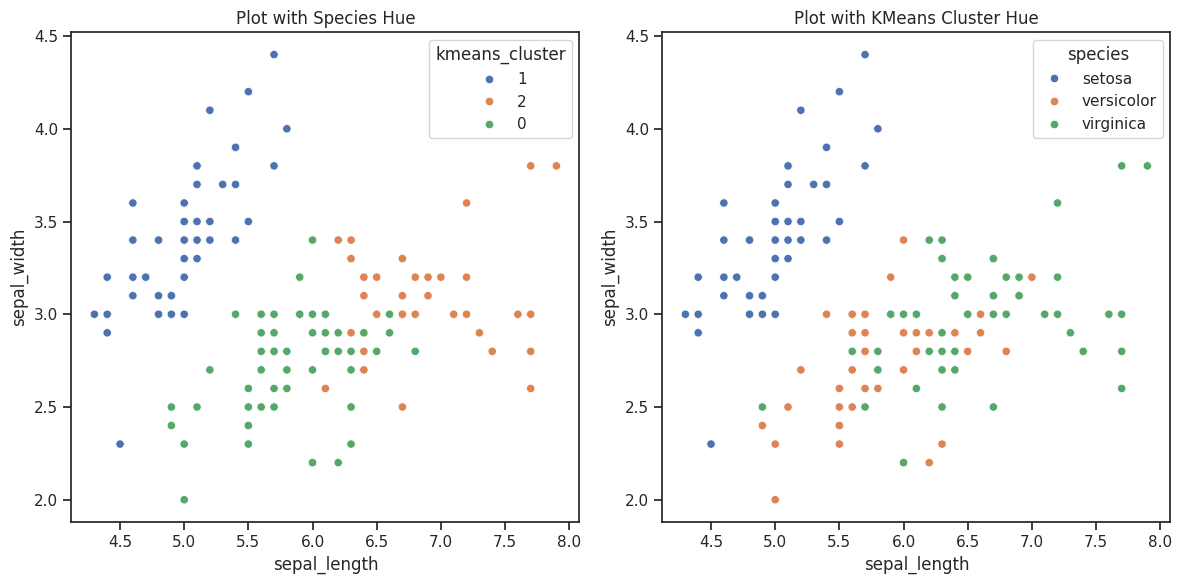

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# First plot with hue as "kmeans_cluster"
sns.scatterplot(data=df_iris, x="sepal_length", y="sepal_width", hue="kmeans_cluster", ax=axes[0])
axes[0].set_title("Plot with Species Hue")

# Second plot with hue as "species"
sns.scatterplot(data=df_iris, x="sepal_length", y="sepal_width", hue="species", ax=axes[1])
axes[1].set_title("Plot with KMeans Cluster Hue")

# Show the plots
plt.tight_layout()
plt.show()

What do the above 2 plots tell you about the quality of the clustering?

Adjust the `n_cluster` parameter to change the number of clusters in the cluster, and choose an appropriate number of clusters according to the characteristics of the data set.

In [51]:
##your code here

Question:

•	**E1**: Which K would you choose for the iris dataset?

### 1.2 Hierarchical clustering

There are four kinds of hierarchical clustering strategies:

* ward: The default strategy, that is, the least variance method. It tends to merge the two clusters that make the variance within the combined cluster minimal.
* complete: When calculating the distance between two clusters, consider the distance between the two samples that are furthest apart in the two clusters.
* average: When calculating the distance between two clusters, consider the average of the distance between all samples in the two clusters.
* single: When calculating the distance between two clusters, consider the distance between the two samples closest to each other in the two clusters


#### Create a dendrogram

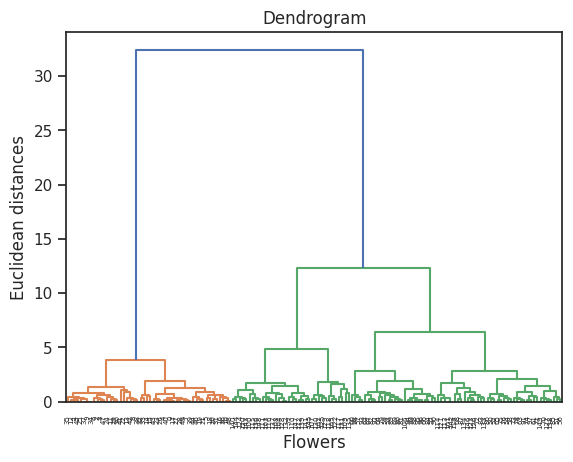

In [53]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Flowers')
plt.ylabel('Euclidean distances')
plt.show()

Create the actual clusters. Just like with k-means clustering, we will add the results to the `df_iris` dataframe.

In [56]:
from scipy.cluster.hierarchy import fcluster

depth_cut = 10
y_hc = fcluster(sch.linkage(X, method = 'ward'), t=depth_cut, criterion='distance')


df_iris['y_hc'] = y_hc
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species,kmeans_cluster,y_hc
0,5.1,3.5,1.4,0.2,setosa,1,1
1,4.9,3.0,1.4,0.2,setosa,1,1
2,4.7,3.2,1.3,0.2,setosa,1,1
3,4.6,3.1,1.5,0.2,setosa,1,1
4,5.0,3.6,1.4,0.2,setosa,1,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2,2
146,6.3,2.5,5.0,1.9,virginica,0,3
147,6.5,3.0,5.2,2.0,virginica,2,2
148,6.2,3.4,5.4,2.3,virginica,2,2


Is the clustering generated by k-means the same as by hierarchical clustering? Check the table.

We will also plot this.

Actually, let's do a PCA as well so that we can plot all points nicely in 2D.

In [61]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df_iris["pca1"] = X_pca[:, 0]
df_iris["pca2"] = X_pca[:, 1]

Text(0.5, 1.0, 'hierarchical')

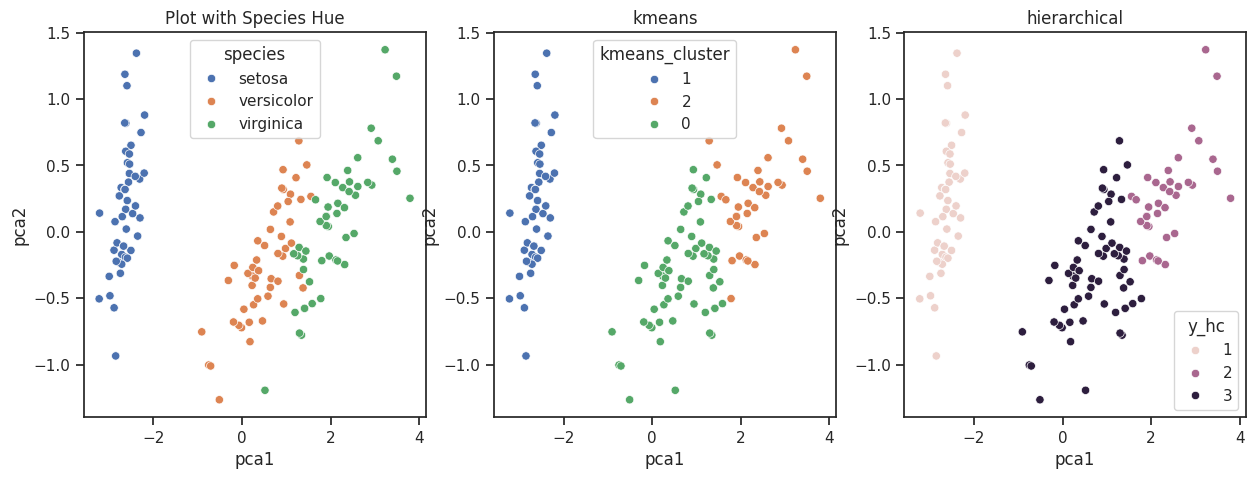

In [64]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.scatterplot(data=df_iris, x="pca1", y="pca2", hue="species", ax=axes[0])
axes[0].set_title("Plot with Species Hue")

sns.scatterplot(data=df_iris, x="pca1", y="pca2", hue="kmeans_cluster", ax=axes[1])
axes[1].set_title("kmeans")

sns.scatterplot(data=df_iris, x="pca1", y="pca2", hue="y_hc", ax=axes[2])
axes[2].set_title("hierarchical")

###Question : strategy

Retry the same hierarchical clustering, but using complete or single linkage. How does that change your results?

In [ ]:
##your code here

#### We can use a loop to show four mode's result as one plot

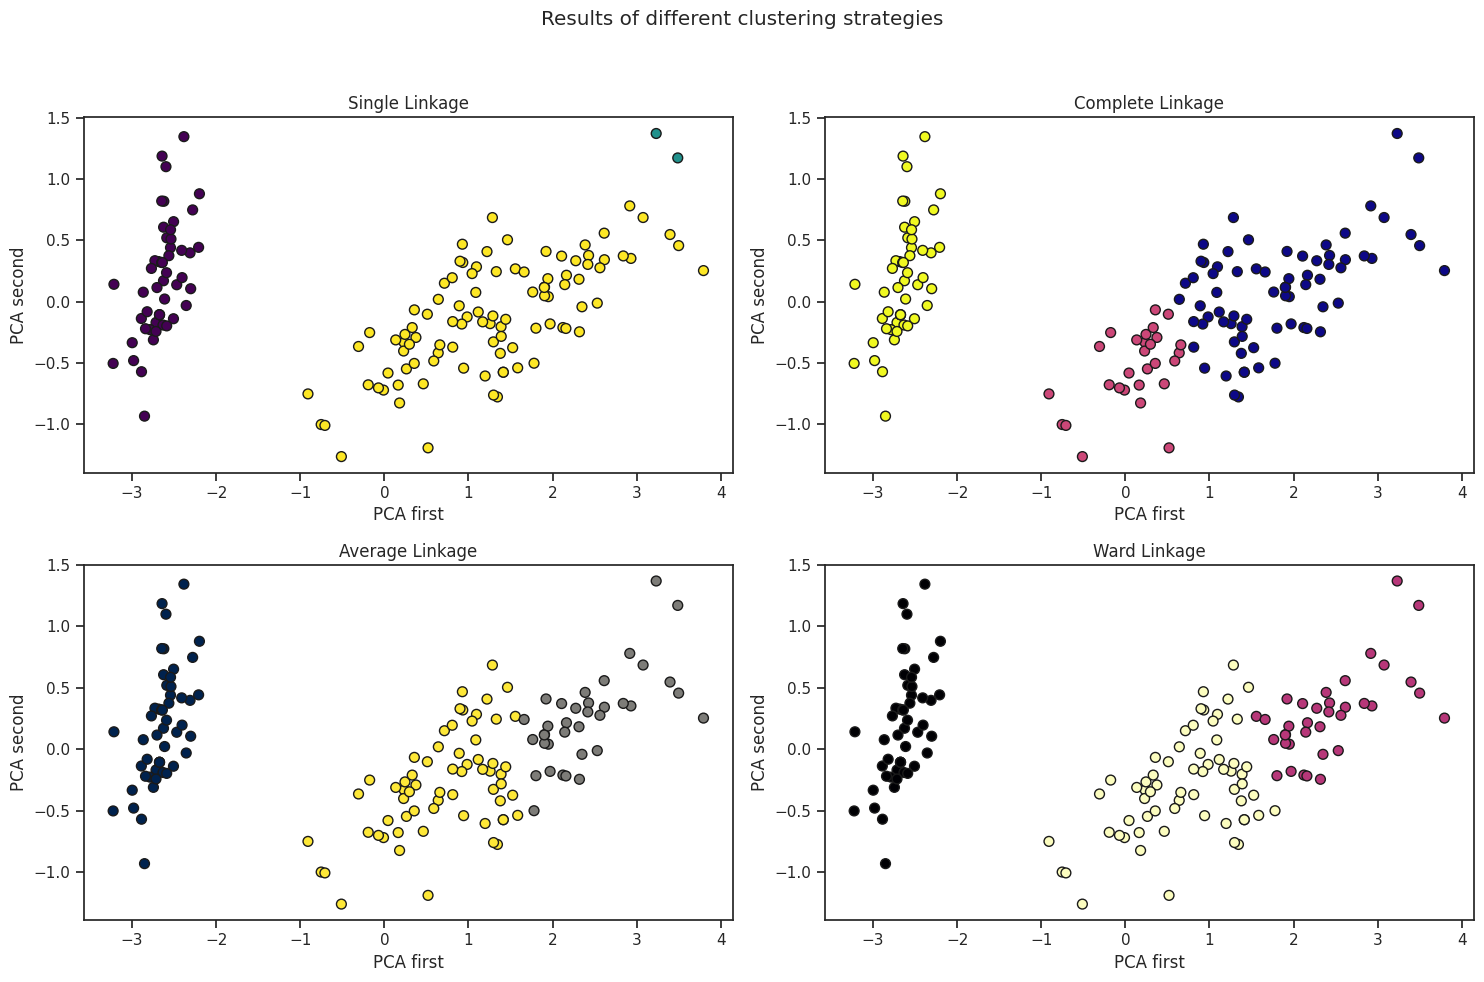

In [65]:
from scipy.cluster.hierarchy import linkage, fcluster

linkage_methods = ['single', 'complete', 'average', 'ward']
colors = ['viridis', 'plasma', 'cividis', 'magma']


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


plt.figure(figsize=(15, 10))

for i, method in enumerate(linkage_methods):
    Z = linkage(X, method=method)

    y_hc = fcluster(Z, t=3, criterion='maxclust')


    plt.subplot(2, 2, i + 1)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_hc, cmap=colors[i], edgecolor='k', s=50)
    plt.title(f"{method.capitalize()} Linkage")
    plt.xlabel("PCA first")
    plt.ylabel("PCA second")

plt.suptitle("Results of different clustering strategies")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### 1.3 HDBSCAN
 How HDBSCAN works (https://hdbscan.readthedocs.io/en/latest/how_hdbscan_works.html)


The best way to explain HDBSCAN is actually just use it and then go through the steps that occurred along the way teasing out what is happening at each step. So let's load up the hdbscan library and get to work.

In [ ]:
pip install hdbscan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 35.3 MB/s eta 0:00:00


In [ ]:
import hdbscan

In [ ]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
cluster_labels = clusterer.fit_predict(X)

#### Build the minimum spanning tree

We can build the minimum spanning tree very efficiently via Prim's algorithm -- we build the tree one edge at a time, always adding the lowest weight edge that connects the current tree to a vertex not yet in the tree. You can see the tree HDBSCAN constructed below; note that this is the minimum spanning tree for mutual reachability distance which is different from the pure distance in the graph. In this case we had a k value of 5.

<Axes: >

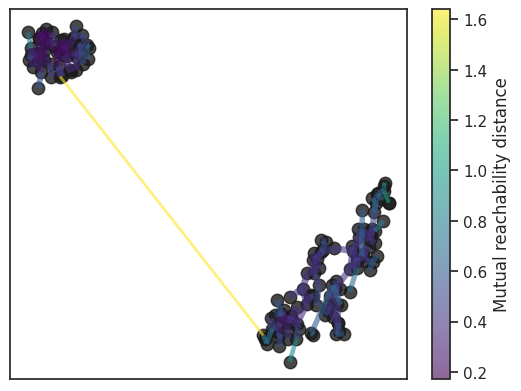

In [ ]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                   edge_alpha=0.6,
                   node_size=80,
                   edge_linewidth=2)

#### Build the cluster hierarchy

Given the minimal spanning tree, the next step is to convert that into the hierarchy of connected components. This is most easily done in the reverse order: sort the edges of the tree by distance (in increasing order) and then iterate through, creating a new merged cluster for each edge. The only difficult part here is to identify the two clusters each edge will join together, but this is easy enough via a union-find data structure. We can view the result as a dendrogram as we see below:



<Axes: ylabel='distance'>

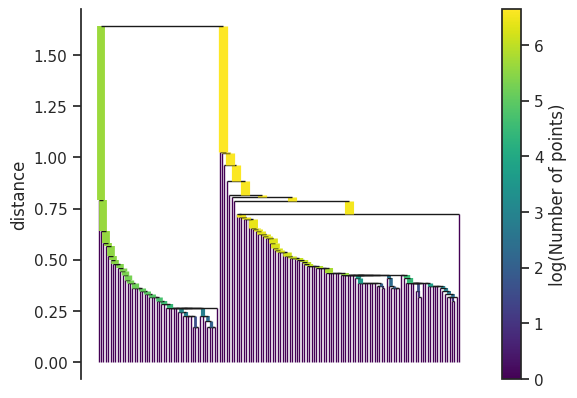

In [ ]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

#### Condense the cluster tree

The first step in cluster extraction is condensing down the large and complicated cluster hierarchy into a smaller tree with a little more data attached to each node. As you can see in the hierarchy above it is often the case that a cluster split is one or two points splitting off from a cluster; and that is the key point -- rather than seeing it as a cluster splitting into two new clusters we want to view it as a single persistent cluster that is 'losing points'. To make this concrete we need a notion of minimum cluster size which we take as a parameter to HDBSCAN. Once we have a value for minimum cluster size we can now walk through the hierarchy and at each split ask if one of the new clusters created by the split has fewer points than the minimum cluster size. If it is the case that we have fewer points than the minimum cluster size we declare it to be 'points falling out of a cluster' and have the larger cluster retain the cluster identity of the parent, marking down which points 'fell out of the cluster' and at what distance value that happened. If on the other hand the split is into two clusters each at least as large as the minimum cluster size then we consider that a true cluster split and let that split persist in the tree. After walking through the whole hierarchy and doing this we end up with a much smaller tree with a small number of nodes, each of which has data about how the size of the cluster at that node descreases over varying distance. We can visualize this as a dendrogram similar to the one above -- again we can have the width of the line represent the number of points in the cluster. This time, however, that width varies over the length of the line as points fall our of the cluster. For our data using a minimum cluster size of 5 the result looks like this:

<Axes: ylabel='$\\lambda$ value'>

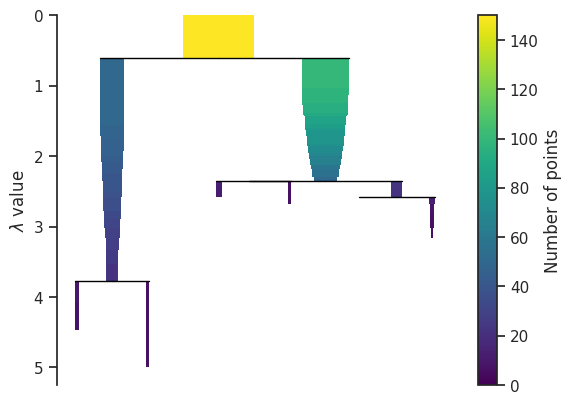

In [ ]:
clusterer.condensed_tree_.plot()

#### Extract the clusters

select the clusters in the plot with the largest total ink area

<Axes: ylabel='$\\lambda$ value'>

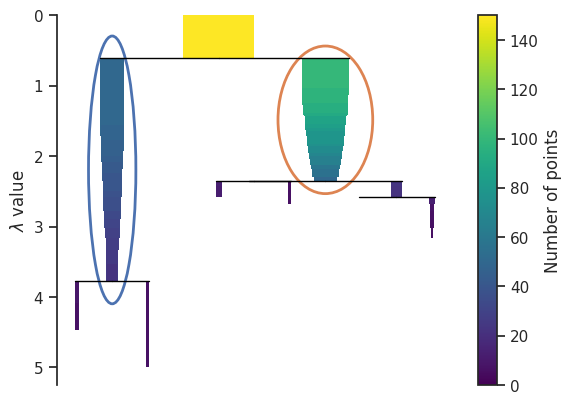

In [ ]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

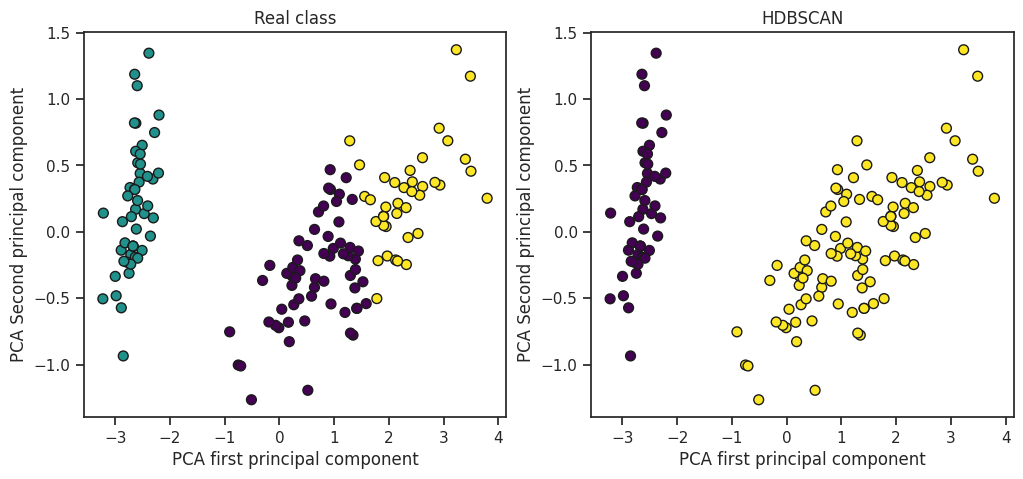

Accuracy of HDBSCAN: 0.00


In [ ]:
y_hdbscan = clusterer.labels_
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=LabelEncoder().fit_transform(y), cmap='viridis', edgecolor='k', s=50)
plt.title("Real class")
plt.xlabel("PCA first principal component")
plt.ylabel("PCA Second principal component")

# 绘制 HDBSCAN 聚类结果
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_hdbscan, cmap='viridis', edgecolor='k', s=50)
plt.title("HDBSCAN")
plt.xlabel("PCA first principal component")
plt.ylabel("PCA Second principal component")
plt.show()

# HDBSCAN
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
accuracy = accuracy_score(y_encoded, y_hdbscan)

print(f"Accuracy of HDBSCAN: {accuracy:.2f}")

####Question : Parameter Selection

#####Selecting `min_cluster_size`
The primary parameter to effect the resulting clustering is `min_cluster_size`. Ideally this is a relatively intuitive parameter to select – set it to the smallest size grouping that you wish to consider a cluster. It can have  effects however.

##### Selecting `min_samples`

The simplest intuition for what `min_samples` does is provide a measure of how conservative you want your clustering to be. The larger the value of `min_samples` you provide, the more conservative the clustering – more points will be declared as noise, and clusters will be restricted to progressively more dense areas.

#####Selecting `cluster_selection_epsilon`
The choice of `cluster_selection_epsilon` depends on the given distances between your data points. For example, set the value to 0.5 if you don’t want to separate clusters that are less than 0.5 units apart. This will basically extract DBSCAN* clusters for epsilon = 0.5 from the condensed cluster tree, but leave HDBSCAN* clusters that emerged at distances greater than 0.5 untouched.

We can see those changes in practice.

In [ ]:
##your code here

•	**E4**: why does the Accuracy of HDBSCAN bad? How to fix it?

•	**E5**: what clustering algorithms should you be using?

**Beans dataset**

use HDBSCAN clustering on beans dataset

In [ ]:
##your code here


## 2 Beans dataset
Let's now do the same for the beans dataset

In [ ]:
df_beans_full = pd.read_csv('http://vda-lab.github.io/assets/Dry_Bean_Dataset.csv')

# Remove the features that are combinations of other features
df_beans = df_beans_full[['Area','Perimeter','MajorAxisLength','MinorAxisLength','Eccentricity','ConvexArea','EquivDiameter','Extent','Solidity','Class']]

# Take a sample of 500
# df_beans = df_beans.sample(n=500)
df_beans

,Area,Perimeter,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Class
0,28395,610.291,208.178117,173.888747,0.549812,28715,190.141097,0.763923,0.988856,SEKER
1,28734,638.018,200.524796,182.734419,0.411785,29172,191.272751,0.783968,0.984986,SEKER
2,29380,624.110,212.826130,175.931143,0.562727,29690,193.410904,0.778113,0.989559,SEKER
3,30008,645.884,210.557999,182.516516,0.498616,30724,195.467062,0.782681,0.976696,SEKER
4,30140,620.134,201.847882,190.279279,0.333680,30417,195.896503,0.773098,0.990893,SEKER
...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,0.765002,42508,231.515799,0.714574,0.990331,DERMASON
13607,42101,757.499,281.576392,190.713136,0.735702,42494,231.526798,0.799943,0.990752,DERMASON
13608,42139,759.321,281.539928,191.187979,0.734065,42569,231.631261,0.729932,0.989899,DERMASON
13609,42147,763.779,283.382636,190.275731,0.741055,42667,231.653247,0.705389,0.987813,DERMASON


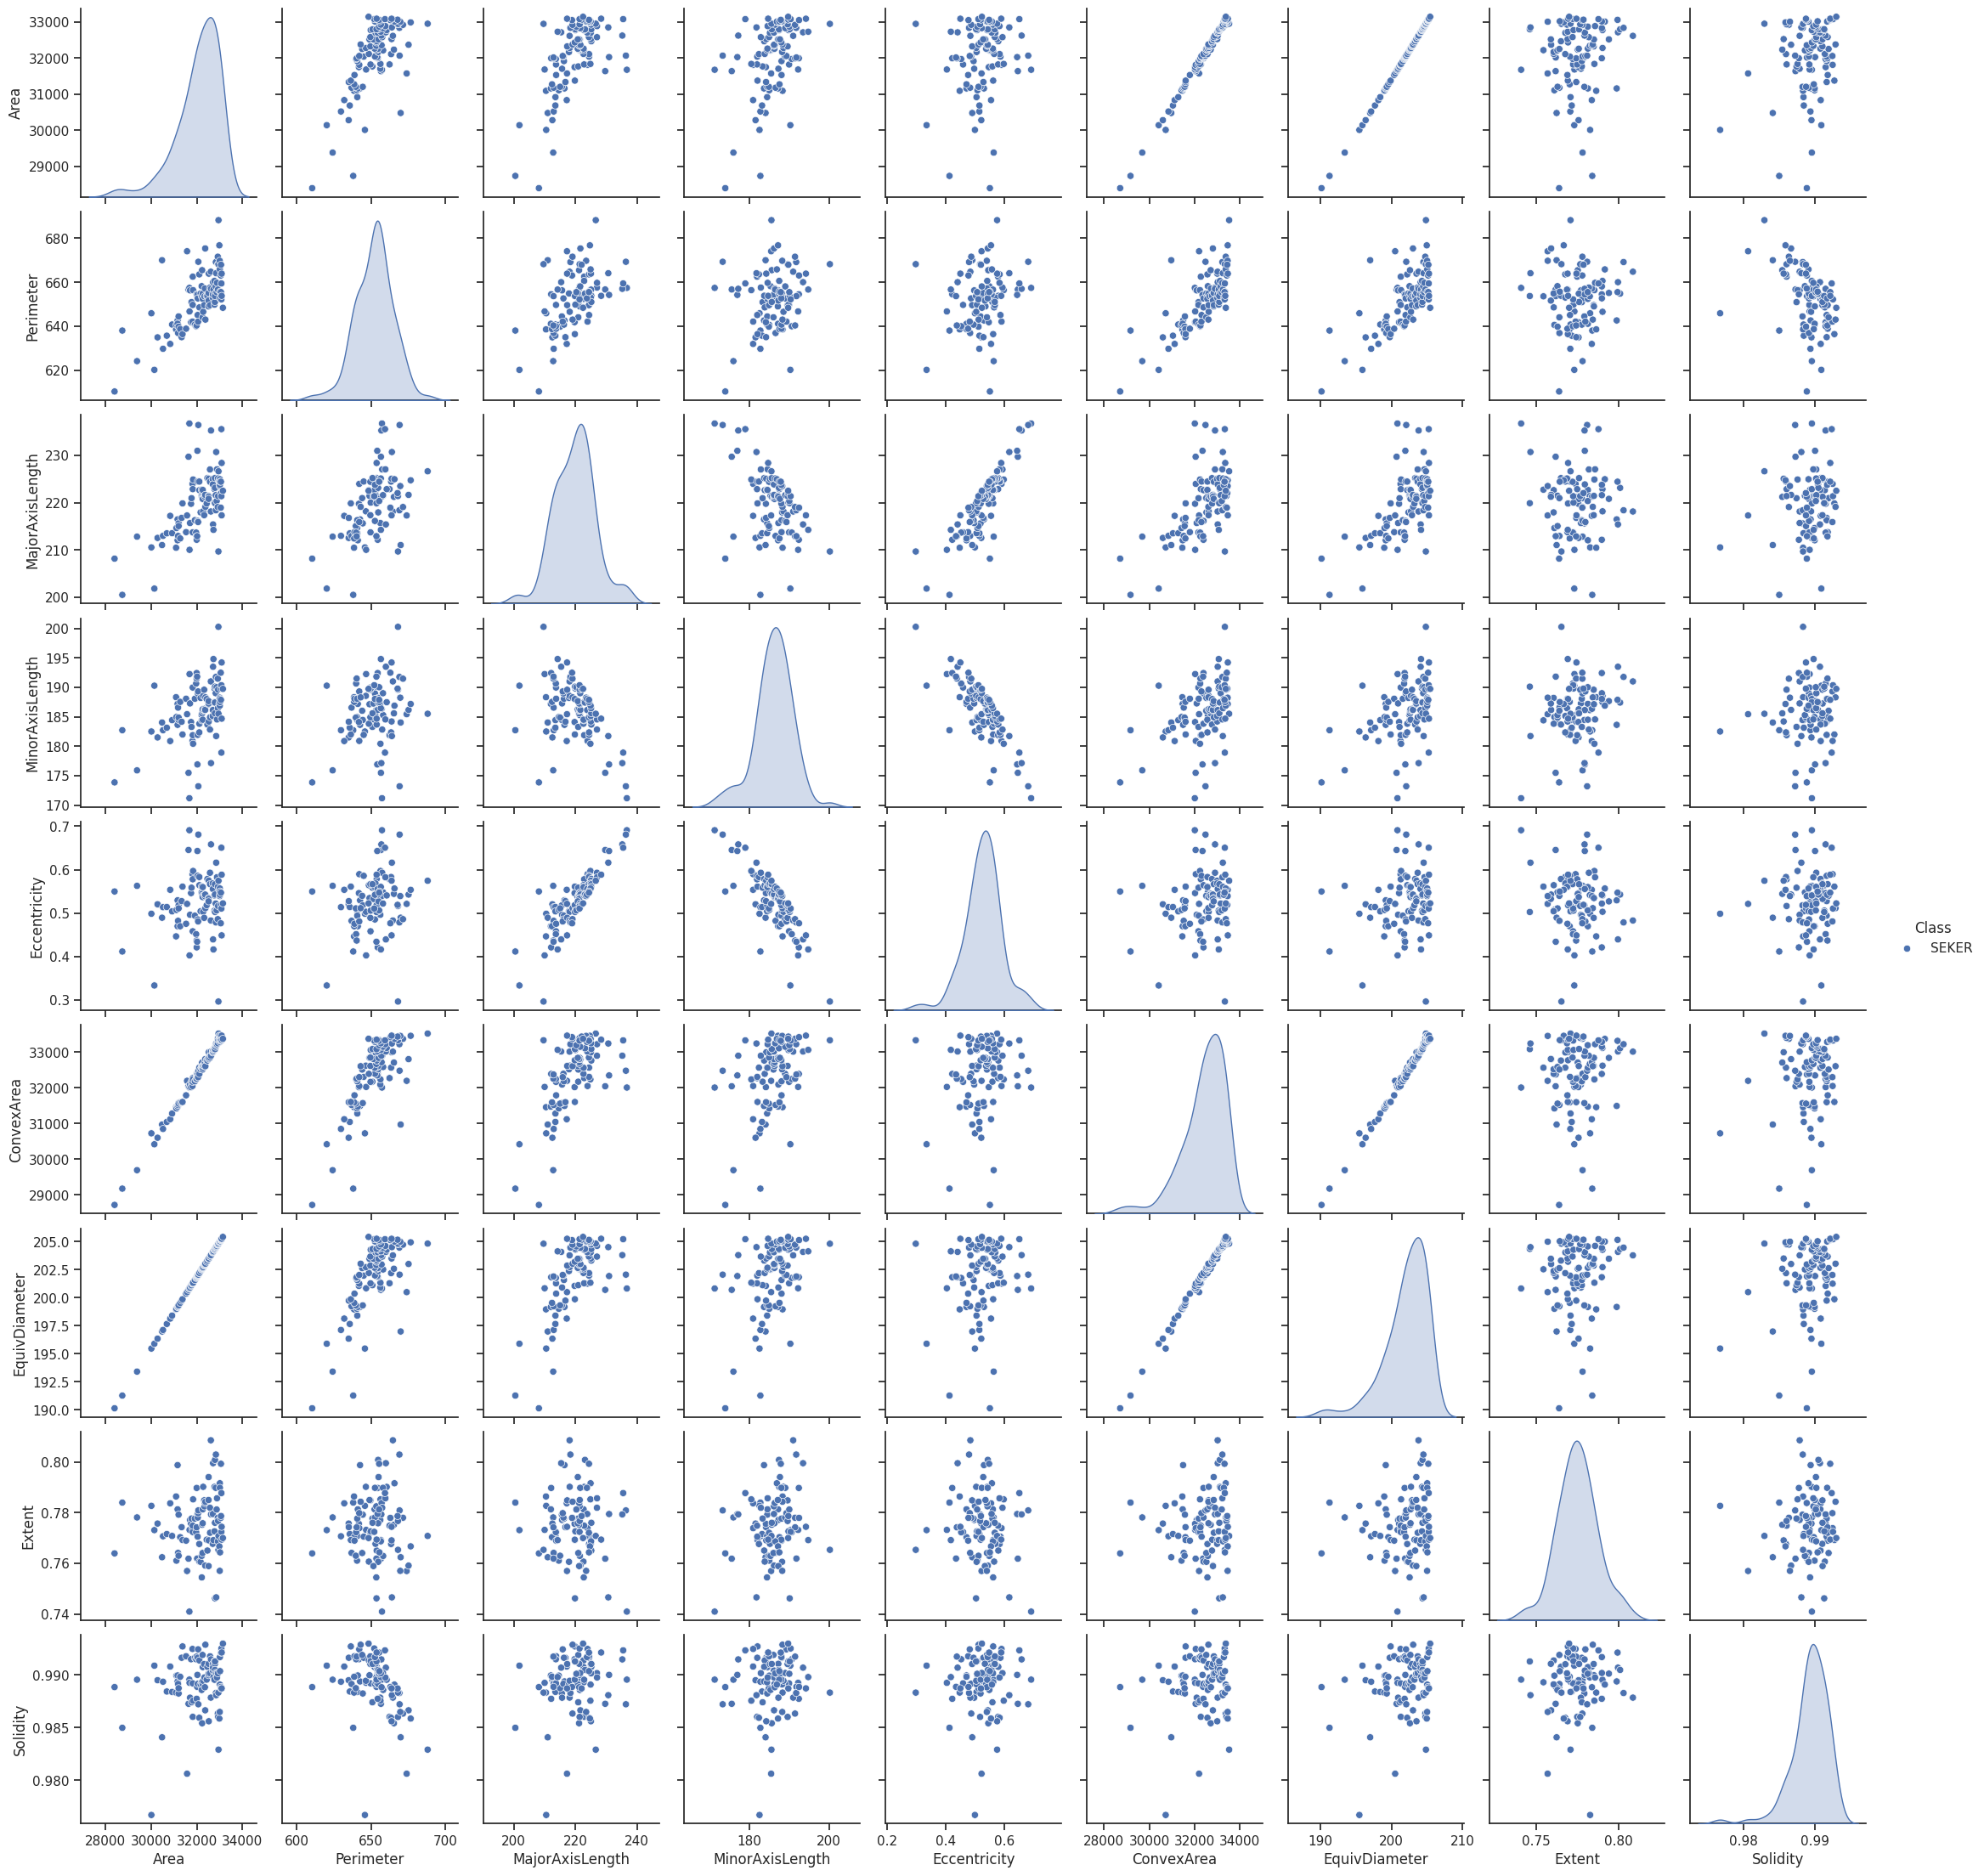

In [ ]:
sns.pairplot(df_beans[:100], hue="Class")

For the data clustering, we can only have numerical values, so we will remove the "Class" variable.

In [ ]:
X = df_beans[['Area','Perimeter','MajorAxisLength','MinorAxisLength','Eccentricity','ConvexArea','EquivDiameter','Extent','Solidity']].values
print(type(df_beans))
print(type(X))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [ ]:
# YOUR CODE